In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "autism/consolidated",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "autism/consolidated",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2936 files belonging to 2 classes.
Using 2349 files for training.
Found 2936 files belonging to 2 classes.
Using 587 files for validation.


In [119]:
arr=[a for b in val_ds for a in b]

In [126]:
val_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

<ipython-input-61-26c0d9c68807>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


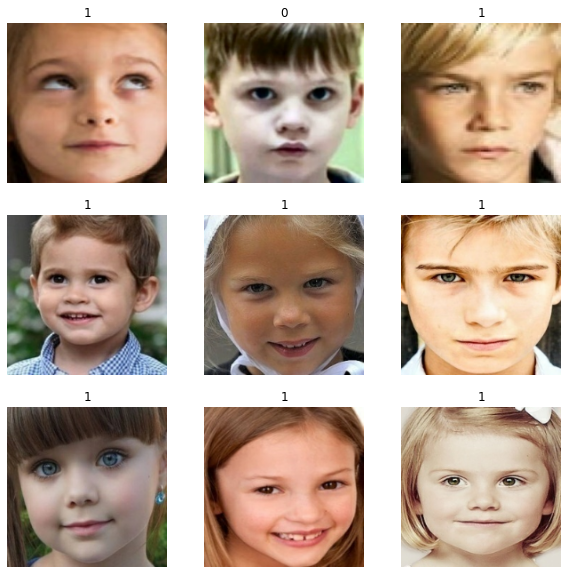

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [56]:
IMG_SHAPE = (180,180, 3)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model = tf.keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])
learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss='binary_crossentropy',
              metrics=['accuracy']
)

9412608/9406464 [==============================] - 7s 1us/step


In [60]:
num_epochs = 30
steps_per_epoch = round(2349)//batch_size
val_steps = 20
model.fit(train_ds.repeat(),
          epochs=num_epochs,
          steps_per_epoch = steps_per_epoch,
          validation_data=val_ds.repeat(), 
          validation_steps=val_steps)

Epoch 1/30
73/73 [==============================] - 108s 1s/step - loss: 0.9240 - accuracy: 0.5681 - val_loss: 0.7687 - val_accuracy: 0.5994
Epoch 2/30
73/73 [==============================] - 93s 1s/step - loss: 0.7788 - accuracy: 0.6081 - val_loss: 0.7385 - val_accuracy: 0.6074
Epoch 3/30
73/73 [==============================] - 106s 1s/step - loss: 0.7308 - accuracy: 0.6392 - val_loss: 0.7032 - val_accuracy: 0.6333
Epoch 4/30
73/73 [==============================] - 101s 1s/step - loss: 0.7090 - accuracy: 0.6444 - val_loss: 0.6787 - val_accuracy: 0.6640
Epoch 5/30
73/73 [==============================] - 125s 2s/step - loss: 0.6820 - accuracy: 0.6565 - val_loss: 0.6707 - val_accuracy: 0.6656
Epoch 6/30
73/73 [==============================] - 101s 1s/step - loss: 0.6614 - accuracy: 0.6651 - val_loss: 0.6663 - val_accuracy: 0.6688
Epoch 7/30
73/73 [==============================] - 111s 2s/step - loss: 0.6450 - accuracy: 0.6690 - val_loss: 0.6626 - val_accuracy: 0.6753
Epoch 8/30
73/

In [127]:
model.metrics('accuracy')

TypeError: 'list' object is not callable

In [97]:
model.save('autism_fin.h5')

In [93]:
base_model_i = tf.keras.applications.InceptionResNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model_i.trainable = False

maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model_i = tf.keras.Sequential([
    base_model_i,
    maxpool_layer,
    prediction_layer
])
learning_rate = 0.0001

model_i.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [98]:
num_epochs = 10
steps_per_epoch = round(2349)//batch_size
val_steps = 20
model_i.fit(train_ds.repeat(),
          epochs=num_epochs,
          steps_per_epoch = steps_per_epoch,
          validation_data=val_ds.repeat(), 
          validation_steps=val_steps)

Epoch 1/10
73/73 [==============================] - 371s 5s/step - loss: 4.7651 - accuracy: 0.5295 - val_loss: 5.4138 - val_accuracy: 0.5089
Epoch 2/10
73/73 [==============================] - 363s 5s/step - loss: 4.3905 - accuracy: 0.5252 - val_loss: 4.8962 - val_accuracy: 0.5622
Epoch 3/10
73/73 [==============================] - 338s 5s/step - loss: 4.3871 - accuracy: 0.5343 - val_loss: 4.6082 - val_accuracy: 0.5363
Epoch 4/10
16/73 [=====>........................] - ETA: 3:20 - loss: 4.4677 - accuracy: 0.4848

KeyboardInterrupt: 

In [84]:
img = keras.preprocessing.image.load_img(
    "autism/consolidated/autistic/0001.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent autistic and %.2f percent non-autistic."
    % (100 * (1 - score), 100 * score)
)

This image is 87.10 percent autistic and 12.90 percent non-autistic.


In [90]:
from PIL import Image

image = Image.open("autism/consolidated/autistic/0001.jpg")
image.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\VARSHA\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


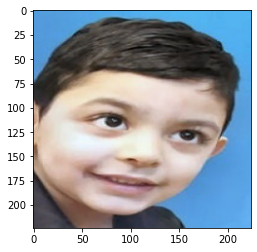

In [91]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("autism/consolidated/autistic/0001.jpg")
imgplot = plt.imshow(img)
plt.show()

In [78]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam

mod = Sequential()


mod.add(Conv2D(64,(3,3), padding='same', input_shape=(180,180,3)))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Dropout(0.25))

mod.add(Conv2D(128,(5,5), padding='same'))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Dropout(0.25))

mod.add(Conv2D(512,(3,3), padding='same'))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Dropout(0.25))

mod.add(Conv2D(512,(3,3), padding='same'))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(Dropout(0.25))


mod.add(Flatten())

mod.add(Dense(256))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(Dropout(0.25))

mod.add(Dense(512))
mod.add(BatchNormalization())
mod.add(Activation('relu'))
mod.add(Dropout(0.25))

mod.add(Dense(1, activation='softmax'))

opt = Adam(lr=0.0005)
mod.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
mod.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_217 (Conv2D)          (None, 180, 180, 64)      1792      
_________________________________________________________________
batch_normalization_223 (Bat (None, 180, 180, 64)      256       
_________________________________________________________________
activation_221 (Activation)  (None, 180, 180, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 90, 90, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 90, 90, 128)       204928    
_________________________________________________________________
batch_normalization_224 (Bat (None, 90, 90, 128)      

In [79]:
num_epochs = 10
steps_per_epoch = round(2349)//batch_size
val_steps = 20
mod.fit(train_ds.repeat(),
          epochs=num_epochs,
          steps_per_epoch = steps_per_epoch,
          validation_data=val_ds.repeat(), 
          validation_steps=val_steps)

Epoch 1/10
73/73 [==============================] - 1231s 17s/step - loss: 0.0000e+00 - accuracy: 0.4966 - val_loss: 0.0000e+00 - val_accuracy: 0.5202
Epoch 2/10
73/73 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.4950 

KeyboardInterrupt: 